# Redes Complejas 2018: Trabajo Computacional 1
*Por Tomás Ferreira Chase, Matías Leizerovich y Gabriel Goren*

## Ejercicio 1: Proteínas

En este ejercicio, nos familiarizamos con el manejo más básico de redes empleando la librería `networkx` así como con algunas cantidades que podemos medir sobre las mismas.

Primero importamos las librerías que precisamos.

In [4]:
from lectura import ldata
import networkx as nx
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from __future__ import division # Compatibilidad con python2


Luego definimos las funciones que vamos a utilizar.

In [5]:
def es_dirigido(data):
    """Data en forma de lista de enlaces (tuplas). Si el resultado es 0,
    entonces es no dirigido; si es distinto de cero, es dirigido."""
    n = 0
    for (x, y) in data:
        for (a, b) in data:
            if a == y and b == x:
                n += 1
    return n/2

def k_medio(G):
    N = G.order()
    if isinstance(G, nx.DiGraph):
        kin_med = sum(k for (nodo, k) in G.in_degree) / N
        kout_med = sum(k for (nodo, k) in G.out_degree) / N
    else:
        kin_med, kout_med = 0, 0
    k_med = sum(k for (nodo, k) in G.degree) / N
    return kin_med, kout_med, k_med

def k_extremos(G):
    k_min = min(k for (nodo, k) in G.degree)
    k_max = max(k for (nodo, k) in G.degree)
    return k_min, k_max

def clustering_medio(G):
    return np.average(list(dict(nx.clustering(G)).values()))

Importamos las redes.

In [6]:
apms = ldata('Tp1/tc01_data/yeast_AP-MS.txt')

lit = ldata('Tp1/tc01_data/yeast_LIT.txt')

y2h = ldata('Tp1/tc01_data/yeast_Y2H.txt')

In [7]:
g_apms = nx.DiGraph()
g_apms.add_edges_from(apms)

g_lit = nx.DiGraph()
g_lit.add_edges_from(lit)

g_y2h = nx.DiGraph()
g_y2h.add_edges_from(y2h)

### Punto a

En primer lugar visualizamos las redes que hemos importado. Según nos indica la consigna, se trata de redes de interacción de proteínas relevadas para levadura, por lo cual podemos decir que las tres redes representan un mismo sistema físico.

En principio asumamos que las 3 redes son dirigidas.

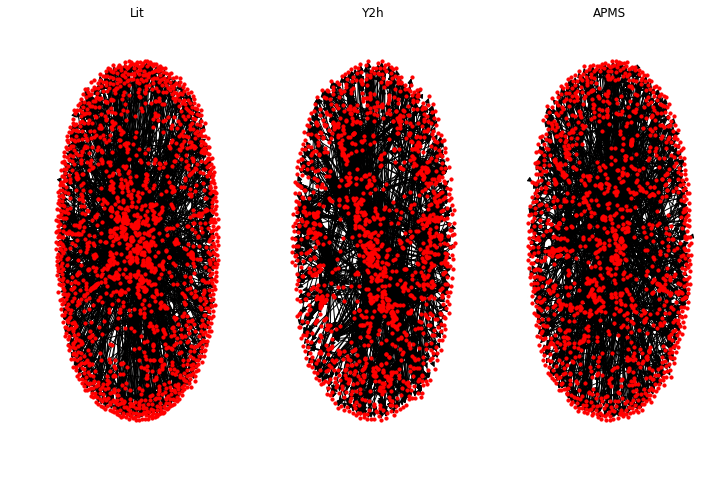

In [12]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 8))


plt.sca(ax1)
ax2.set_title('Y2h')
nx.draw(g_y2h, node_size = 10)

plt.sca(ax2)
ax3.set_title('APMS')
nx.draw(g_apms, node_size = 10)

plt.sca(ax3)
ax1.set_title('Lit')
nx.draw(g_lit, node_size = 10)

plt.show()

### Punto b

Presentamos una tabla con los datos que se pedian

In [93]:
data = pd.DataFrame({"Nombre de la red": ['Y2H','AP-MS','Lit'],
                     "N":[2018,1622,1536],
                     "L":[2930,9070,2925],
                     "Dirigida?":['Si','No','Si'],
                     "$$\overline{K}$$":[2.9038652130822595,11.183723797780518,3.80859375],
                     "$$\overline{K_{in}}$$":[1.4519326065411298,'-',1.904296875],
                     "$$\overline{K_{out}}$$":[1.4519326065411298,'-',1.904296875],
                     "$$K_{min}$$":[1,1,1],
                     "$$K_{max}$$":[91,127,40],
                     "Densidad":[0.0014396951973635397,0.006899274397150227,0.002481168566775244],
                     "$$<C_{i}>$$":[0.046194001297365124,0.5546360657013015,0.2924923005815713],
                     "$$C_{\Delta}$$":[0.02361415364051535, 0.6185901626483971, 0.3461926495315878],
                     "Diametro (para la componente gigante)":[14,15,19],
                    })#empty dataframe
data

,$$<C_{i}>$$,$$C_{\Delta}$$,$$K_{max}$$,$$K_{min}$$,$$\overline{K_{in}}$$,$$\overline{K_{out}}$$,$$\overline{K}$$,Densidad,Diametro (para la componente gigante),Dirigida?,L,N,Nombre de la red
0,0.046194,0.023614,91,1,1.45193,1.45193,2.903865,0.001440,14,Si,2930,2018,Y2H
1,0.554636,0.618590,127,1,-,-,11.183724,0.006899,15,No,9070,1622,AP-MS
2,0.292492,0.346193,40,1,1.9043,1.9043,3.808594,0.002481,19,Si,2925,1536,Lit


Obs: Los valores que tienen un asterisco se computaron asumiendo que las redes Y2h y Lit son no dirigidas.

A continuación, se desarrollan los calculos para obtenes los valores de la tabla.

El criterio para disernir si una red es dirigida es el siguiente. Si observamos en la lista de conecciones entre nodos de la red que existen pares de nodos conetados 2 veces entre sí, la red es dirigida. 

In [45]:
print(es_dirigido(y2h), es_dirigido(apms),
      es_dirigido(lit))

112.5 0.0 40.5


Vemos que bajo este criterio, las redes Y2H y Lit son dirigidas, mientras que la red AP-MS no.

Observación: Charlando con los chicos de la práctica, coincidimos en que este criterio para distinguir entre redes dirigidas y no dirigidas no es correcto, ya que el hecho de que exista mas de una concección entre el mismo par de nodos se puede deber a que la red no fue lo suficientemente depurada. Eventualmente vamos a asumir que las tres redes son no dirigidas.

Para calcular cuantos nodos hay:

In [51]:
print('El número de nodos de cada grafo es',
      g_y2h.order(), g_apms.order(), g_lit.order()) 

El número de nodos de cada grafo es 2018 1622 1536


Para calcular cuantos enlaces hay:

In [52]:
print('El número de enlaces para cada grafo es',
      g_y2h.size(), g_apms.size(), g_lit.size())

El número de enlaces para cada grafo es 2930 9070 2925


Calculamos el grado medio (sin tener en cuenta la dirección de los enlaces) para las 3 redes, y el grado medio de entrada y de salida para las redes dirigidas.

In [58]:
kin_medio_lit, kout_medio_lit, k_medio_lit = k_medio(g_lit)
kin_medio_y2h, kout_medio_y2h, k_medio_y2h = k_medio(g_y2h)
_, _, k_medio_apms = k_medio(g_apms)

print('Grados medios')
print(k_medio_y2h, k_medio_apms, k_medio_lit)
print('Grados medios in')
print(kin_medio_y2h, '----',kin_medio_lit)
print('Grados medios out')
print(kout_medio_y2h, '----',kout_medio_lit)


Grados medios
2.9038652130822595 11.183723797780518 3.80859375
Grados medios in
1.4519326065411298 ---- 1.904296875
Grados medios out
1.4519326065411298 ---- 1.904296875


Para las redes dirigidas,  kin y kout medios dan lo mismo. Esto se explica si pensamos en una red en donde existen 2 nodos que no estan conectados entre si. Si ahora tendemos un enlace dirigido entre ambos, tanto el grado medio kin como el grado medio kout aumentaran.

Observación: A partir de aqui, se asumira que todas las redes son no dirigidas.

In [59]:
g_apms = nx.Graph()
g_apms.add_edges_from(apms)

g_lit = nx.Graph()
g_lit.add_edges_from(lit)

g_y2h = nx.Graph()
g_y2h.add_edges_from(y2h)

Calculo del grado maximo y el grado minimo.

In [63]:
k_min_apms, k_max_apms = k_extremos(g_apms)
k_min_lit, k_max_lit = k_extremos(g_lit)
k_min_y2h, k_max_y2h = k_extremos(g_y2h)
print('Grados extremos')
print('K_min:', k_min_y2h,  k_min_apms, k_min_lit)
print('K_max:', k_max_y2h,  k_max_apms, k_max_lit)

Grados extremos
K_min: 1 1 1
K_max: 91 127 40


Para calcular la densidad de la red, usamos la función nx.density.

In [67]:
print('La densidad de las redes es', nx.density(g_y2h), nx.density(g_apms), nx.density(g_lit))

La densidad de las redes es 0.0014396951973635397 0.006899274397150227 0.002481168566775244


Vamos a calcular dos coeficientes de clustering. El primero ($\left<C_i\right>$) es un promedio entre los coeficientes de cluesting local de cada nodo de la red. El segundo ($C_\Delta$) es un coeficiente de clustering global que mide la proporción de triganulo formados en la red sobre el número de triadas de la misma.

In [70]:
print('C_Δ')
print (nx.transitivity(g_y2h), nx.transitivity(g_apms),
       nx.transitivity(g_lit))

print('<C_i>')
print(clustering_medio(g_y2h))
print(clustering_medio(g_apms))
print(clustering_medio(g_lit))

C_Δ
0.02361415364051535 0.6185901626483971 0.3461926495315878
<C_i>
0.046194001297365124
0.5546360657013015
0.2924923005815713


Observacion importante: El método C_Δ no diferencia entre enlaces entrantes y salientes en redes dirigidas. El método <C_i> no está definido para redes dirigidas.

Para calcular el diámetro de la red, utilizamos la función nx.diameter.

In [75]:
print('El diámetro de las redes es', nx.diameter(g_y2h), nx.diameter(g_apms),nx.diameter(g_lit))

NetworkXError: Found infinite path length because the graph is not connected

Como se observa, el diametro de las tres redes es infinito, ya que existen nodos que no estan conectados entre si. Lo que podemos hacer es calcular el diámetro de la componente gigante.

In [84]:
#Creamos sub-redes que consten unicamente de las componentes gigantes 
#de las redes originales y les calculamos el diámetro.

gc_y2h = max(nx.connected_component_subgraphs(g_y2h), key=len)
gc_apms = max(nx.connected_component_subgraphs(g_apms), key=len)
gc_lit = max(nx.connected_component_subgraphs(g_lit), key=len)

In [85]:
print('Diámetro para la red Y2H', nx.diameter(gc_y2h))
print('Diámetro para la red AP-MS', nx.diameter(gc_apms))
print('Diámetro para la red Lit', nx.diameter(gc_lit))

Diámetro para la red Y2H 14
Diámetro para la red AP-MS 15
Diámetro para la red Lit 19


### Punto c

Algunas observaciones que podemos hacer a partir de nuestro analisis. En primer lugar, se observa que los coeficientes de clustering y la densidad de la red AP-MS es mayor que la de la red Y2H y la red Lit, que a su vez poseen densidad y clusterizacion similar. Esto va en concordancia con el hecho de que la red AP-MS tiende a organizarse en clickers (grupos de nodos, todos conectados con todos), como se puede observar en la grafica de la misma.

## Ejercicio 2

Importamos nuestras librerías

In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from networkx.readwrite.gml import read_gml
from random import sample
from lectura import ldata
from __future__ import division


import sys
sys.path.append('./Tp1/')
from collections import Counter

Definimos las funciones que vamos a utilizar.

In [4]:
#Para graficar
def genero_a_color(gender):
    if gender=='m':
        return 'red'
    elif gender=='f':
        return 'dodgerblue'
    else:
        return 'green'
    
def particionar_por_genero(G, orden={'f':0, 'NA':1, 'm':2}):
    particiones = [[], [], []]
    for key in dict(G.nodes).keys():
        gender = G.nodes[key]['gender']
        if gender=='f':
            particiones[orden[gender]].append(key)
        elif gender=='m':
            particiones[orden[gender]].append(key)
        else:
            particiones[orden[gender]].append(key)
    return particiones

def crear_leyenda(ax):
    ax.plot([],[], 'o', color='dodgerblue', label='Hembras')
    ax.plot([],[], 'o', color='red', label='Machos')
    ax.plot([],[], 'o', color='black', label='NA')
    ax.legend()
    
    
def histograma(valores_a_binear, bins='auto', errbars=True, density=True,
               logbins=False, logx=False, logy=False,
               ax=None,
               titulo=None, xlabel=None, ylabel=True,
               labelsize=18, ticksize=16,
               ecolor=None, anotacion=False):
    """Función maestra (?) para realizar los histogramas más bellos que usted
    haya soñado jamás.
    
    Inputs
    ------
    valores_a_binear : lista o ndarray
        Los valores que se van a volcar en el histograma
    bins : int, list, string o 3-tuple        
        Si es int, es el número de bines. Si es list, debe ser la lista de
        los bordes de los bines. Si es string 'auto', funciona igual
        que pasarle bins='auto' a la función np.histogram. Si es una tupla,
        sus elementos deben ser la pos. del borde izquierdo del 1er bin, la
        pos. del borde derecho del último bin, y el número de bines deseado
        (en ese orden).
    titulo : string
        Título a ponerle al histograma.
    xlabel : string
        Rótulo del eje x del histograma
    density : Bool
        Si True, grafica el histograma normalizado (funciona bien incluso si
        los bines son de diferente tamaño)
    logbins : Bool
        Si True, y bins es una 3-tupla con inicio, final y número de bines,
        entonces el tamaño de los bines entre inicio y final crece 
        exponencialmente (ancho constante en escala logarítmica en eje x).
    logx : Bool
        Si True, se grafica el eje x en escala logarítmica.
    logy : Bool
        Si True, se grafica el eje y en escala logarítmica.
    ax : matplotlib.axes.Axes object
        axes sobre el cual graficar el histograma. Si es None, crea una nueva
        figura para graficar.
    ecolor : string
        Color de los bordes de los bines. Si esNone, los bines no tienen bordes
        diferenciados.
    anotacion : Bool
        Si True, agrega un cuadro con el número de eventos y de bines graficados
        Por ahora, el lugar en que el cuadro se coloca es estático y puede
        solaparse con el histograma.
        
    Notas
    -----
    Si bien no está expuesto de manera explícita, esta función también sirve
    para hacer histogramas de cantidades discretas en escala lineal (en los
    cuales es habitual no agregar eventos correspondientes a números enteros
    diferentes). Para ello, basta pasar como parámetro
        bins=np.arange(x_inicial, x_final+2).
    El +2 dos es por lo siguiente: un +1 es necesario para que np.arange
    incluya el valor x_final en el array resultante, y otro es necesario para
    que además incluya el valor x_final + 1 que corresponde al borde derecho
    del último bin, el cual es necesario pasar a np.histogram.
    """
    
    if ax is None:
        with plt.style.context(('seaborn')):
            fig, ax = plt.subplots()
    else:
        fig = ax.get_figure()
        
    if logx:
        ax.set_xscale('log')
    if logy:
        ax.set_yscale('log')

    if isinstance(bins, tuple):
        if logbins:
            start, stop, nbins = bins
            bins = np.geomspace(start, stop, num=nbins)
#            ax.plot(bins,[0]*len(bins), '+k') # testing
        else:
            start, stop, nbins = bins
            bins = np.linspace(start, stop, num=nbins)
        
    conteos, bordes_bines = np.histogram(valores_a_binear, bins=bins)
    w = np.diff(bordes_bines) # Anchos de los bines
    
    # Normalizar, si es necesario, y asignar errores
    if density == True:
        cnorm = conteos / (np.sum(conteos) * w)
        enorm = np.sqrt(conteos) / (np.sum(conteos) * w)
        conteos, errores = cnorm, enorm
    else:
        errores = np.sqrt(conteos)
    
    # Graficar
    if errbars:
        ax.bar(bordes_bines[:-1], conteos, width=w, yerr=errores, align='edge',
               color='dodgerblue', capsize=0, edgecolor=ecolor)
    else:
        ax.bar(bordes_bines[:-1], conteos, width=w, align='edge',
               color='dodgerblue', edgecolor=ecolor)
    
    ax.tick_params(labelsize=ticksize)
    if titulo != None:
        ax.set_title(titulo, fontsize=labelsize)
    if xlabel != None:
        ax.set_xlabel(xlabel, fontsize=labelsize)
    if ylabel:
        ylabel = '# de eventos' if density==False else '# de eventos normalizado'
        ax.set_ylabel(ylabel, fontsize=labelsize)    
    if anotacion:
        num_bines = len(bordes_bines) - 1
        anotacion = ('$N = $' + str(len(valores_a_binear))+ '\n' +
                     r'$N_{bines}$ = ' + str(num_bines))
        ax.annotate(anotacion,
                    (.8, .8), xycoords='axes fraction',
                    backgroundcolor='w', fontsize=14)
    
    fig.tight_layout()
    plt.show()
    return fig, ax

In [5]:
#Para graficar red multipartita
def position_multipartito(g, clases, nombre_clase):
    """g es un objeto Graph de networkX, cuyos nodos deben tener un atributo
    llamado nombre_clase. clases es una lista con los valores posibles que
    puede adoptar dicho atributo (que corresponderán cada uno a una columna).
    Devuelve un diccionario cuyos keys son los nombres de los nodos y cuyos
    valores son las posiciones para graficar.
    Ejemplo con datos de los delfines:
        clases == ['f', 'm', 'NA']
        nombre_clase == 'gender'
      
    Modificado a partir de código de James A. Foster en
    https://stackoverflow.com/questions/35472402/how-do-display-bipartite-graphs-with-python-networkx-package
    """
    xPos = {}
    yPos = {}
    for indice, clase in enumerate(clases):
        xPos[clase] = indice
        yPos[clase] = 0

    pos = {}
    for node, attrDict in g.nodes(data=True): # Piola sintaxis lo de data=True
        clase_nodo = attrDict[nombre_clase]
        # print('Nodo: {}\t{}: {}'.format(node, nombre_clase, clase_nodo))     
        # print('\t(x,y): ({},{})'.format(xPos[clase_nodo], yPos[clase_nodo]))
        pos[node] = (xPos[clase_nodo], yPos[clase_nodo])
        yPos[clase_nodo] += 2

    return pos

def position_multipartito_random(g, clases, nombre_clase, dhorizontal=2):
    """g es un objeto Graph de networkX, cuyos nodos deben tener un atributo
    llamado nombre_clase. clases es una lista con los valores posibles que
    puede adoptar dicho atributo (que corresponderán cada uno a una columna).
    dhorizontal es el espaciado entre clases diferentes de nodos.
    Devuelve un diccionario cuyos keys son los nombres de los nodos y cuyos
    valores son las posiciones para graficar.
    Ejemplo con datos de los delfines:
      clases == ['f', 'm', 'NA']
      nombre_clase == 'gender'
    """
  
    pos = nx.random_layout(g)
    for node, attrDict in g.nodes(data=True):
        clase_nodo = attrDict[nombre_clase]
    for i, clase in enumerate(clases):
        if clase_nodo==clase:
            adicion = dhorizontal*i
        posx_old = pos[node][0]
        posy_old = pos[node][1]
        pos[node] = np.array([posx_old + adicion, posy_old])
    return pos

def position_multipartito_spectral(g, clases, nombre_clase, dhorizontal=2):
    """g es un objeto Graph de networkX, cuyos nodos deben tener un atributo
    llamado nombre_clase. clases es una lista con los valores posibles que
    puede adoptar dicho atributo (que corresponderán cada uno a una columna).
    dhorizontal es el espaciado entre clases diferentes de nodos.
    Devuelve un diccionario cuyos keys son los nombres de los nodos y cuyos
    valores son las posiciones para graficar.
    Ejemplo con datos de los delfines:
        clases == ['f', 'm', 'NA']
        nombre_clase == 'gender'
    """
  
    pos = nx.spectral_layout(g)
    for node, attrDict in g.nodes(data=True):
        clase_nodo = attrDict[nombre_clase]
        for i, clase in enumerate(clases):
            if clase_nodo==clase:
                adicion = dhorizontal*i
        posx_old = pos[node][0]
        posy_old = pos[node][1]
        pos[node] = np.array([posx_old + adicion, posy_old])
    return pos

def position_multipartito_spring(g, clases, nombre_clase, dhorizontal=1):
    """g es un objeto Graph de networkX, cuyos nodos deben tener un atributo
    llamado nombre_clase. clases es una lista con los valores posibles que
    puede adoptar dicho atributo (que corresponderán cada uno a una columna).
    dhorizontal es el espaciado entre clases diferentes de nodos.
    Devuelve un diccionario cuyos keys son los nombres de los nodos y cuyos
    valores son las posiciones para graficar.
    Ejemplo con datos de los delfines:
        clases == ['f', 'm', 'NA']
        nombre_clase == 'gender'
    """
  
    pos = nx.spring_layout(g)
    for node, attrDict in g.nodes(data=True):
        clase_nodo = attrDict[nombre_clase]
        for i, clase in enumerate(clases):
            if clase_nodo==clase:
                adicion = dhorizontal*i
        posx_old = pos[node][0]
        posy_old = pos[node][1]
        pos[node] = np.array([posx_old + adicion, posy_old])
    return pos

def position_multipartito_kk(g, clases, nombre_clase, dhorizontal=1):
    """g es un objeto Graph de networkX, cuyos nodos deben tener un atributo
    llamado nombre_clase. clases es una lista con los valores posibles que
    puede adoptar dicho atributo (que corresponderán cada uno a una columna).
    dhorizontal es el espaciado entre clases diferentes de nodos.
    Devuelve un diccionario cuyos keys son los nombres de los nodos y cuyos
    valores son las posiciones para graficar.
    Ejemplo con datos de los delfines:
      clases == ['f', 'm', 'NA']
      nombre_clase == 'gender'
    """
  
    pos = nx.kamada_kawai_layout(g)
    for node, attrDict in g.nodes(data=True):
        clase_nodo = attrDict[nombre_clase]
        for i, clase in enumerate(clases):
            if clase_nodo==clase:
                adicion = dhorizontal*i
        posx_old = pos[node][0]
        posy_old = pos[node][1]
        pos[node] = np.array([posx_old + adicion, posy_old])

    return pos

In [6]:
#Para cuantificar homofilia.
def contar_clases(g, atributo, valores_posibles):
    ns = []
    for valor in valores_posibles:
        n = len([n for n, attrdict in dict(g.nodes).items() if attrdict[atributo]==valor])
        ns.append(n)
        print('Hay {} nodos con {}={}'.format(n, atributo, valor))
    return ns

def contar_enlaces_internos(g, atributo, valor):
    """Cuenta los enlaces internos en el grupo de nodos que tienen
    atributo=valor. g debe ser objeto Graph de NetworkX.
    Ejemplo con delfines: atributo='gender', valor puede ser 'f', 'm' o 'NA'
    """
    nodos = [n for n, attrdict in dict(g.nodes).items() if attrdict[atributo]==valor]
    grupo = nx.subgraph(g, nodos)
    return grupo.size()

def contar_enlaces_entre_grupos(g, atributo):
    """Cuenta los enlaces que conectan grupos con valores distintos de
    atributo. g debe ser objeto Graph de NetworkX.
    Ejemplo con delfines: atributo='gender'.
    """
    n = 0
    for edge in g.edges():
        a, b = edge[0], edge[1]
        if g.nodes()[a][atributo] != g.nodes()[b][atributo]:
            n = n + 1
    return n

In [7]:
#Para el calculo de la modularidad
def modularidad(g, atributo):
    A = nx.adjacency_matrix(g)
    B = 0
    m = len(g.edges())
    k = []
    name = []
    for key, value in g.degree():
        k.append(value)
        name.append(key)
    for i in range(len(k)):
        for j in range(len(k)):
            if g.node[name[i]][atributo] == g.node[name[j]][atributo]:
                B += A[i, j] - k[i]*k[j]/(2*m)
    return float(B)/(2*m)

In [8]:
#Para calcular el p-value
def p_value(datos, valor_real=52):
    enlace = list(Counter(datos).keys())
    cuantos = list(Counter(datos).values())
    indices = np.where(np.array(enlace)<= valor_real)[0] 
    a = [cuantos[i] for i in indices]
    return 2 * len(a)/len(datos)

Importamos la red de delfines y a cada uno le asignamos un sexo.

In [9]:
dolph = read_gml('Tp1/tc01_data/new_dolphins.gml')
genders = dict(ldata('Tp1/tc01_data/dolphinsGender.txt'))

# Agrego los sexos a los dicts de cada delfín
for nodo, dict_nodo in dict(dolph.nodes).items():
    dict_nodo['gender'] = genders[nodo] # agrego el sexo del delfín a su dict
#    print('Key = {}, Value = {}'.format(nodo, dict_nodo)) # para chequear que anda

particiones = particionar_por_genero(dolph)
colores = [genero_a_color(g) for g in nx.get_node_attributes(dolph, "gender").values()]    

Hay 34 delfines macho, 24 delfines hembra y 4 delfines sin información

### Punto a

Graficamos de 9 maneras diferentes. 

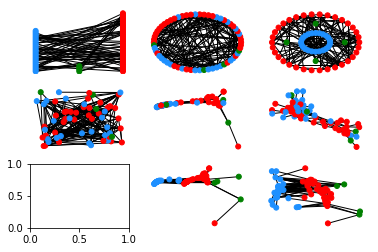

In [25]:
fig, axes = plt.subplots(3,3)
axes = axes.flatten()
ns = 25 # Node size
# Posicionamiento multipartito (es engañoso: no se ven los links homofílicos)
multipartite_pos = position_multipartito(dolph, ['f', 'NA', 'm'], 'gender')
nx.draw(dolph, ax = axes[0], node_size = ns, node_color=colores,
        pos=multipartite_pos)
# Posicionamiento en un círculo
nx.draw_circular(dolph, ax = axes[1], node_size = ns, node_color=colores)
# Posicionamiento en círculos concéntricos
shell_pos = nx.drawing.layout.shell_layout(dolph, particiones)
nx.draw(dolph, ax = axes[2], node_size = ns, node_color=colores,
        pos=shell_pos)
# Posicionamiento al azar
nx.draw_random(dolph, ax = axes[3], node_size = ns, node_color=colores)
# Posicionamiento espectral
nx.draw_spectral(dolph, ax = axes[4],
                 node_size = ns, node_color=colores)

# Posicionamiento por resortes
nx.draw_spring(dolph, ax = axes[5],
                 node_size = ns, with_labels=False, node_color=colores)

#Mati:Hay problemas para visualizar esta red, pero no veo que pasa.

## Posicionamiento multipartito al azar. Posiciono al azar y
## luego desplazo lateralmente según género
#multi_random_pos = position_multipartito_random(dolph,
#                                                ['f', 'm', 'NA'], 'gender')
#nx.draw(dolph, ax = axes[6], node_size = ns, node_color=colores,
#        pos=multi_random_pos)


# Posicionamiento multipartito espectral. Posiciono por espectro y
# luego desplazo lateralmente según género
multi_spectral_pos = position_multipartito_spectral(dolph,
                                                    ['f', 'm', 'NA'], 'gender', dhorizontal=0.5)
nx.draw(dolph, ax = axes[7], node_size = ns, node_color=colores,
        pos=multi_spectral_pos)


# Posicionamiento multipartito por resortes. Posiciono por resortes y
# luego desplazo lateralmente según género
multi_spring_pos = position_multipartito_spring(dolph, ['f', 'm', 'NA'],
                                                'gender', dhorizontal=2)
nx.draw(dolph, ax = axes[8], node_size = ns, node_color=colores,
        pos=multi_spring_pos)

En la visualización 6, se observa que existen dos grupos de delfines que interactuan mayormente entre si.

## Punto b

Primero vamos a quedarnos con un subgrafo del original, en donde elminamos los nodos con genero no definido.

In [16]:
delfines_con_info = [d for d in dolph.nodes() if d not in particiones[1]]
dolph2 = nx.subgraph(dolph, delfines_con_info).copy()

Simulamos 1000 redes diferentes

In [18]:
n_simulaciones = int(1000)
enlaces_entre_grupos = np.zeros((n_simulaciones))
modularidades = np.zeros((n_simulaciones))
grafo_h0 = dolph2.copy()
# Vamos a ir modificando este grafo "in place" (no lo clonamos n veces)
for i in range(n_simulaciones):
    # Mezclamos la lista de nombres de delfines.
    # A los primeros 24 delfines les reasignamos género hembra
    # El resto van a ser macho.
    hembras = sample(list(grafo_h0.nodes()), 24)
    for nombre in grafo_h0.nodes():
        if nombre in hembras:
            grafo_h0.nodes()[nombre]['gender'] = 'f'
        else:
            grafo_h0.nodes()[nombre]['gender'] = 'm'
    enlaces_entre_grupos[i] = contar_enlaces_entre_grupos(grafo_h0, 'gender')
    modularidades[i] = modularidad(grafo_h0, 'gender')

Visualizamos la distribución de enlaces para las redes simuladas, marcando el numero total de enlaces de la red original.

In [17]:
valor_real = contar_enlaces_entre_grupos(dolph2, 'gender')
fig, ax = histograma(enlaces_entre_grupos, bins=150, density=True,
                     titulo=r'Distribución de enlaces entre delfines de géneros distintos bajo $H_0$',
                     xlabel='# de enlaces')
ax.axvline(valor_real, color='deeppink',
           label='Valor real = {}'.format(valor_real))
ax.legend()
plt.show()    

Vamos a calcular el p-value. Para eso, integramos el histograma a partir del valor real hasta menos infinito. Como la distribucion es acampanada, duplicamos el valor obtenido para contemplar los valores que se encuentran del otro lado de la distribucion con probabilidad menor que la de del valor real del numero de enlaces.

In [ ]:
p_value(enlaces_entre_grupos)

In [ ]:
Finalmente, visualizamos la distribución de modularidades.

In [ ]:
modularidad_real = modularidad(dolph2, 'gender')
fig, ax = histograma(modularidades, bins=15, density=True,
                     titulo=r'Distribución de modularidad bajo $H_0$',
                     xlabel='Modularidad')
ax.axvline(modularidad_real, color='deeppink',
           label='Valor real = {}'.format(valor_real))

# Ejercicio 3

Falta completar todo esto con comentarios y cosas!!

In [13]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from networkx.readwrite.gml import read_gml
from __future__ import division
import rpy2.robjects as ro # Al hacer esto se inicializa un subproceso de R
from rpy2.robjects.packages import importr

# Usando importr, importamos paquetes de R que van a funcionar algo 
# así como módulos de Python

internet = read_gml('Tp1/tc01_data/as-22july06.gml')
nodes = []
degrees = []
for a, b in internet.degree():
    nodes.append(a)
    degrees.append(b)

In [ ]:
#%% PUNTO A: Comparación de visualizaciones

# Para comparar los bineados logarítmicos y no logaasdrítmicos, lo justo es
# excluir a los nodos de grado 0 en ambos 

fig, axes = plt.subplots(4, 2, figsize=(10,10))
axes = axes.flatten()
logbinss = [0, 0, 0, 0, 1, 1, 1, 1]
logxs    = [0, 0, 1, 1, 0, 0, 1, 1]
logys    = [0, 1, 0, 1, 0, 1, 0, 1]

t = ['Bines lineales', 'Bines logarítmicos']
titulos  = [t[i] for i in logbinss]
xlabels = [('Grado (adim.)' if i in [6,7] else None) for i in range(8)]
ylabels = [(True if i % 2 == 0 else False) for i in range(8)]

for i in range(8):
    histograma(degrees,
               logbins=logbinss[i], logx=logxs[i], logy=logys[i], ax=axes[i],
               titulo=titulos[i], xlabel=xlabels[i], ylabel=ylabels[i],
               ecolor='k', errbars=False, 
               labelsize=10, ticksize=10,
               bins=(1, max(degrees) + 2, 100))


In [ ]:
'''Algo interesante de ver es que el 98% de los degrees estan entre los 
degrees 0 y 20:'''
frac = np.sum([d <= 20 for d in degrees]) / len(degrees)
print(frac)

### AJUSTE DE LEY DE POTENCIAS VIA MÉTODO CLAUSET-SHALIZI-NEWMAN

Vamos a llamar a R desde Python usando la librería rpy2

In [ ]:
## EJECUTAR ESTO si no tienen instalado el paquete igraph (para instalarlo)
## import rpy2's package module
## select a mirror for R packages
#utils = importr('utils')
#utils.chooseCRANmirror(ind=2) # elijo de dónde descargar el paquete
## Instalo
#from rpy2.robjects.vectors import StrVector
#utils.install_packages(StrVector(['igraph']))

In [ ]:
# Realizo el ajuste de la powerlaw
igraph = importr('igraph')
# Creamos un vector de R pasándole los degrees
degrees_r = ro.FloatVector(degrees)
# Documentación de fit_power_law:
# https://rdrr.io/cran/igraph/man/fit_power_law.html
resultado = igraph.fit_power_law(degrees_r, implementation='plfit')
print(resultado.r_repr())

In [ ]:
# Graficamos histograma + ajuste
kmin = resultado.rx2('xmin')[0]
gamma = resultado.rx2('alpha')[0]
ksp = resultado.rx2('KS.p')[0]

from scipy.special import zeta
def powerlaw(x, gamma, kmin):
    # Como nuestro ajuste fue sobre una distribución de probabilidad discreta,
    # la cte de normalización es 1 sobre la función zeta de Riemann generalizada
    return x**(-gamma) / zeta(gamma, kmin)

# ACLARACION IMPORTANTE
# Para que se grafique bien la ley de potencias, es necesario llamar
# a la función powerlaw poniendo kmin=1. Esto se debe a que el histograma
# de grados está normalizado arrancando desde k=1, y no desde el kmin que
# elige la función fit_power_law.

fig, ax = plt.subplots(figsize=(8,6))
titulo = 'Histograma de grados con ajuste por ley de potencias'
histograma(degrees, logbins=True, ax=ax, titulo=titulo,
           logx=True, logy=True,
           xlabel='k (adim.)', ylabel=True, ecolor='k', errbars=False, 
           labelsize=18, ticksize=16, bins=(1, max(degrees) + 2, 50))
xs = np.linspace(1, max(degrees) + 2, 1000)
ax.plot(xs, powerlaw(xs, gamma, 1), '--', color='deeppink',
        label=r'$p(k) \propto k^{-\gamma}$')
#xs = np.arange(1, max(degrees) + 2)
#ax.plot(xs, powerlaw(xs, gamma, kmin), 'o', color='deeppink',
#        label=r'$\gamma = $' + '{:.4g}'.format(gamma))
ax.plot([], [], ' ', label=r'$\gamma = $' + '{:.4g}'.format(gamma))
ax.plot([], [], ' ', label=r'$K_{min} = $' + '{:.0f}'.format(kmin))
ax.plot([], [], ' ', label='p-value (KS) = {:.2g}'.format(ksp))
ax.legend()
#ax.axvline(kmin, color='deeppink')






# Ejercicio 4

### Punto a
### i)

Primero importamos las librerías que necesitamos, e importamos las redes sobre las cuales vamos a trabajar.

In [20]:
from __future__ import division
import sys
sys.path.append('./Tp1/')
import os
os.chdir('./Tp1')
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from networkx.readwrite.gml import read_gml
from histograma import histograma
from scipy.odr import Model, RealData, ODR
from scipy import stats
from asortatividad_funciones import (linear, ClosestToOne, annd, gamma,
                                     chi2_iterative, ks_iterative)

net_science = read_gml('tc01_data/netscience.gml')
july = read_gml('tc01_data/as-22july06.gml')

ModuleNotFoundError: No module named 'histograma'

Para calcular el promedio del grado medio de los vecinos de nodos de grado k  ($k_{nn}$), utilizamos la funcion $annd$(). Dada una red, esta función genera 2 listas: una lista con el grado de cada nodo, y una lista con el grado medio de los vecinos ($annd$) de dicho nodo, calculada con nx.average_neighbor_degree(). Notar que estas listas están ordenadas de la misma forma, es decir, la componente i-ésima de ambas listas corresponden al mismo nodo. Luego, la función itera sobre todos los nodos con la condición de que promedie los $annd$ de todos los nodos con igual grado y lo guarde en una lista. Finalmente la función devuelve la lista de grados, y la lista de los promedios de $annd$ por grado.

La funcion nan_delete() remueve los nan y los inf de la lista de los promedios de $annd$s que aparecen por promediar listas vacías.

In [ ]:
def nan_delete(k_nn):
    """Remueve los inf y los nan de la lista manteniendo su k especifico.
    .
    .
    """
    k = np.arange(0, len(k_nn), 1)
    k_nn_temp = []
    k_temp = []    
    for i in range(len(k_nn)):
        if not np.isinf(k_nn[i]) and not np.isnan(k_nn[i]) and not np.isinf(k[i]):
            k_nn_temp.append(k_nn[i])
            k_temp.append(k[i])
    return k_temp, k_nn_temp

def annd(red):
    """ annd (average neighbouhr degree distribution) devuelve el annd en orden
    de los grados del nodo.
    
    Returns: k, k_nn
    
    k: array con los grados de la red (eje X)
    k_nn: array con los annd promediados por grado (eje Y)
    .
    .
    """
    nombres = list(red.nodes)
    avnedeg = nx.average_neighbor_degree(red)
    grados = nx.degree(red)
    a = []
    for i in range(max(dict(nx.degree(red)).values())+1):
        b = []
        for j in range(len(nombres)):
            if i == grados[nombres[j]]:
                b.append(avnedeg[nombres[j]])
        a.append(np.mean(b))
    k, k_nn = nan_delete(a)
    return k, k_nn

degree_2, annd_2 = annd(net_science)
degree_1, annd_1 = annd(july)

#OBS: si correr esta celda devuelve un error de Mean of empty slice, o similar, no pasa nada.

### ii)

Para observar la tendencia de los $k_{nn}$ graficamos, para cada red, 4 formas distintas de observar los gráficos: la escala lineal, la escala log-log, la cumulativa en escala log-log, y un histograma de los $k_{nn}$. Ambos gráficos fueron generados con la funcón gráficos_multiples(), pasando degree_i como el eje x y annd_i como el eje y.

In [ ]:
def graficos_multiples(x, y, network_name):
    f, ([ax1, ax2], [ax3, ax4]) = plt.subplots(2, 2)
    f.tight_layout()
    f.suptitle(network_name, x=0.53, y = 0.99 ,fontsize=15)
    
    plt.sca(ax1)
    ax1.set_title('(a)  Lineal')
    ax1.plot(x, y, '.')
    ax1.set_ylabel(r'$k_{nn}$')
    ax1.set_xlabel('k')
    
    plt.sca(ax2)
    ax2.set_title('(b)  Log Log')
    ax2.loglog(x, y, '.')
    ax2.set_ylabel(r'$k_{nn}$')
    ax2.set_xlabel('k')
    #ax2.yscale('log')
    #ax2.xscale('log')
    
    plt.sca(ax3)
    coefs_reversed = np.flip(y, 0)
    cumulative = np.cumsum(coefs_reversed)
    cumulative = np.flip(cumulative, 0)
    ax3.set_title('(c)  Cumulative')
    ax3.loglog(x, cumulative, '.')
    ax3.set_xlabel(r'$k_{nn}$')
    
    plt.sca(ax4)
    ax4.set_title('(d)  Log binned histogram')
    histograma(y, ax=ax4, xlabel=r'$k_{nn}$', labelsize=10, ticksize=10)

graficos_multiples(degree_1, annd_1, 'July')
graficos_multiples(degree_2, annd_2, 'Net_science')

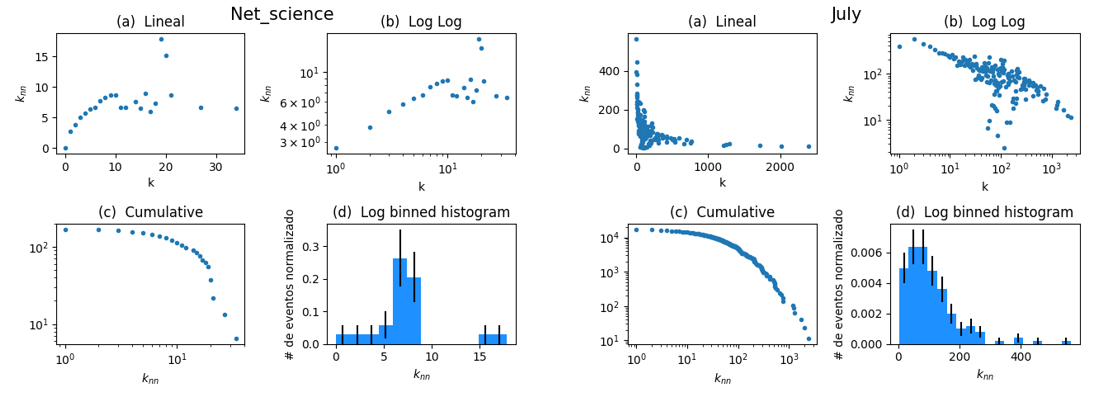

En la red de July se puede observar que decrece el $annd$ promedio a medida que aumenta el grado del nodo. Por otro lado, en la red Net_science el $annd$ promedio aumenta con el grado de los nodos. El análisis de este comportamiento se vera en el punto iv).

### iii)

Se ajustó una recta al logaritmo de $k_{nn}$ en función del logaritmo de k.

In [ ]:
def linear(M, x):
    m, b = M
    return x*m + b


def ajuste_lineal(degree, annd):
    if degree[0] == 0.:
        log_k_nn = [np.log(i) for i in annd[1:]]
        log_k = [np.log(i) for i in degree[1:]]
    else:
        log_k_nn = [np.log(i) for i in annd]
        log_k = [np.log(i) for i in degree]        
    linear_model = Model(linear)
    data = RealData(log_k, log_k_nn)
    odr = ODR(data, linear_model, beta0=[0., 1.])
    out = odr.run()
    log_modelo = [j*out.beta[0]+out.beta[1] for j in log_k]
    return log_k, log_modelo, out.beta[0]

f, (ax1, ax2) = plt.subplots(1, 2)
f.tight_layout()
f.suptitle('Ajustes lineales', x=0.53, y = 0.99 ,fontsize=15)

plt.sca(ax1)
ax1.set_title('July')
ax1.plot(np.log(degree_1), np.log(annd_1), '.')
ax1.plot(ajuste_lineal(degree_1, annd_1)[0], ajuste_lineal(degree_1, annd_1)[1])
ax1.set_ylabel(r'$k_{nn}$')
ax1.set_xlabel('k')
ax1.text(5, 6.5, r'$\mu$ = %s' % round(ajuste_lineal(degree_1, annd_1)[2], 2))

plt.sca(ax2)
ax2.set_title('Net Science')
ax2.plot(np.log(degree_2), np.log(annd_2), '.')
ax2.plot(ajuste_lineal(degree_2, annd_2)[0], ajuste_lineal(degree_2, annd_2)[1])
ax2.set_ylabel(r'$k_{nn}$')
ax2.set_xlabel('k')
ax2.text(1, 2.5, r'$\mu$ = %s' % round(ajuste_lineal(degree_2, annd_2)[2], 2))

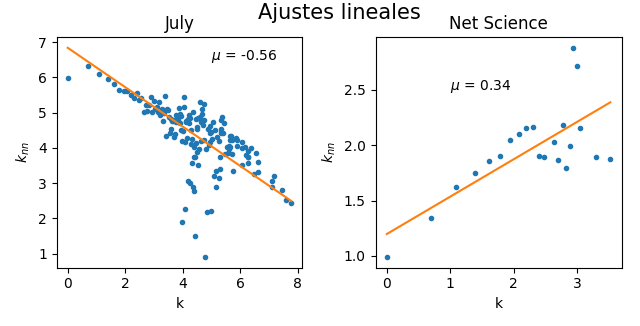

Se puede observar que el exponente de correlación resultó negativo para la red July, mientras que para la red Net science resultó positivo.

### iv)

Finalmente se calculo el coeficiente de asortatividad de Newmann para ambas redes utilizando la funcion de networkx nx.degree_assortativity_coefficient(), como se puede observar en la siguiente tabla.

In [23]:
data = pd.DataFrame({"Red": ['Newmann (r)','Barabassi ($\mu$)'],
                     "July":[-1.98,-0.56],
                     "Net Science":[0.46,0.34],
                    })#empty dataframe
data

,July,Net Science,Red
0,-1.98,0.46,Newmann (r)
1,-0.56,0.34,Barabassi ($\mu$)


Para las dos redes, ambos estimadores no solo resultaron del mismo orden, sino que también tienen el mismo signo. El hecho de que el estimador de Newmann dé negativo indica que la red es disortativa, mientras que si resulta positivo la red es asortativa. 

En este caso, la propiedad de la red que se esta estudiando es el promedio del $annd$ por grado ($k_{nn}$). Por lo tanto, que la red sea asortativa en este aspecto indica que los nodos con alto grado se van a relacionar con nodos de alto grado, mientras que los nodos con grado bajo se van a relacionar con nodos de grado bajo. Es decir, en general los vecinos de los nodos de alto grado van a tener a su vez un grado alto, por lo que su $annd$ va a ser elevado; y los nodos de grado bajo van a tener vecinos con grado bajo, por lo que su $annd$ va a ser pequeño en comparación a los anteriores.

Este estimador es a su vez consistente con el estimador de Barabási, que indica una pendiente positiva en el $k_{nn}$ por grado, para redes asortativas. Es decir, a medida que aumento el grado, también voy a aumentar el $k_{nn}$.

Por el contrario, para redes disortativas va a ocurrir lo contrario. Los nodos con alto grado se van a relacionar en general con nodos de grado bajo, y viceversa. Por lo tanto, el $annd$ de los nodos de grado alto va a ser pequeño, ya que sus vecinos van a tener grado bajo, mientras que el $annd$ de los nodos de grado bajo va a ser grande en general, ya que van a estar relacionados con nodos de grado alto resultando en un elevado $annd$.

De nuevo, este estimador es consistente con el estimador de barabási. Para estas redes indica una pendiente negativa en el $k_{nn}$ por grado. Es decir, a medida que aumento el grado del nodo, en promedio el $annd$ va a decrecer. 

### Punto b


En este punto corremos los mismos codigos que en el Punto a, pero para las redes de proteínas g_y2h y g_apms.

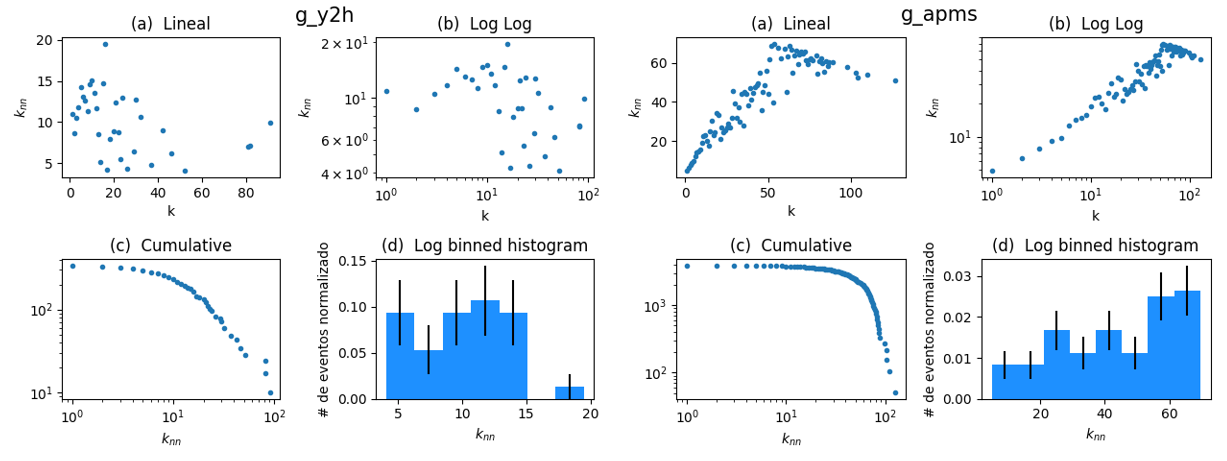

Luego, si se ajustan los graficos log-log por rectas, se observa que la red g_y2h tiene una pendiente negativa, mientras que la red g_apms tiene una pendiente positiva.

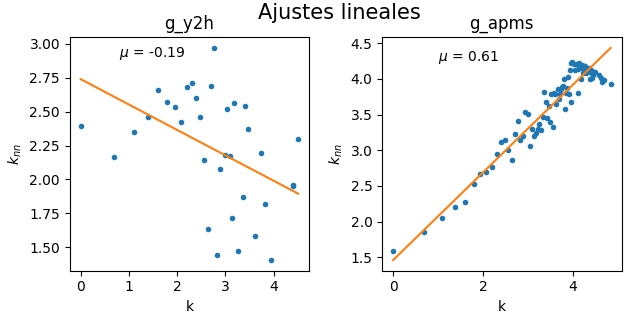

Por otro lado, si se calcula el coeficiente de asortatividad de Newmann para ambas redes, resulta

Red          Newmann    Barabasi\\
                r        $\mu$\\
g_apms         0.61       0.61\\
g_y2h         -0.055     -0.19\\

Nuevamente, los coeficientes resultan del mismo orden y del mismo signo para los dos métodos. Luego, se puede concluir que la red g_apms es una red asortativa, donde en promedio los nodos con alto $annd$ se relacionan con nodos de alto $annd$, mientras que los nodos de bajo $annd$ se relacionan con nodos de bajo $annd$. Por otro lado, la red g_y2h es una red disortativa en la cual los nodos de bajo grado tienden a relacionarse con nodos de alto $annd$ en promedio, y los nodos de grado alto tienden a relacionarse con nodos de bajo $annd$ en promedio